# Assignment Week 11
## Group Assignment (Group 10)

#### 1. Please download `demo_midpoint.zip` und unpack it. What is the purpose of the main script `demo_midpoint.py`? What conclusion can you make by running the script? 

The main script `demo_midpoint.py` determines the running time of the Python functions `midpoint` and `midpoint_vec`, which can both be used to calculate numerical integration with the midpoint method, respectively, and calculate the ratio of them. The formmer uses a loop to add all the little intervals together, while the latter stores the nodes $\{x_i\}$ in an array $x$ and calculates the sum of $\{f(x_i)\}$ by weight.

By running the script, we can find that `midpoint_vec` is much more efficient than `midpoint`.

In [45]:
%run demo_midpoint.py

Time, midpoint: 35.6339 seconds
Time, midpoint vec: 1.42211 seconds
Efficiency factor: 25.057


#### 2. Write a function to that numerically estimates the integral
$$
A =\int^b_af (x)dx
$$

#### using the trapezoid rule. 
The simplest version of the trapezoid rule, which generally gives a very crude estimate, is
$$
A_0 = \frac{1}{2}h_0[f (a) + f (b)], \; h_0 = b - a
$$

Repeatedly applying the trapezoid rule gives the following succession of estimates
$$
\begin{aligned}
A_1& = \frac{1}{2}h_1[f (a) + f (a + h_1)] + \frac{1}{2}h_1[f (a + h_1) + f (b)],\; h_1 = \frac{1}{2}h_0\\
&= \frac{1}{2}h_1[f (a) + 2f (a + h_1) + f (b)]\\
&= \frac{1}{2}A_0 + h_1f (a + h_1)\\
A_2 &= \frac{1}{2}A_1 + h_2[f (a + h_2) + f (b - h_2)],\; h_2 = \frac{1}{2}h_1\\
A_3& = \frac{1}{2}A_2 + h_3[f (a + h_3) + f (a + 3h_3) + f (a + 5h_5) + f (b-h_3)],\;h_3 = \frac{1}{2}h_2\\
&\vdots\\
A_n &= \frac{1}{2}A_{n-1} + h_n
\sum_{i=1,3,\cdots}^{2^{n-1}}
f (a + ih_n),\; h_n = \frac{1}{2}
h_{n-1},\; \text{for }n\geq 1
\end{aligned}
$$
Write a function that implements the trapezoid rule by first evaluating $A_0$, then $A_1$, $\cdots$ until $(A_i -A_{i-1})/A_i < \epsilon$.

In [1]:
import numpy as np

def trapezoid_rule(f, a, b, eps):
    
    h = b - a  # h_0
    A = 0.5 * h * (f(a) + f(b))  # A_0
    
    n = 1
    h = h / 2  # h_1
    Anew = 0.5 * A + h * f(a + h)  # A_1
    
    while abs((Anew - A) / Anew) > eps:
        n += 1
        h = h / 2  # h_n
        A = Anew
        summ = 0
        for i in np.arange(1, 2**n, 2):
            summ += f(a + i * h)
        Anew = 0.5 * A + h * summ  # A_n
    
    return Anew

#### Try your trapezoid integration function on the following integrals and show that you get an answer within the specified tolerance of the exact value.

   (1) $\int_2^5 x^2 dx=39$

   (2) $\int_0^\pi \sin x dx =2$

   (3) $\int_0^{3.5} e^{-x^2}dx=\frac{\sqrt{\pi}}{2}\text{erf}(3.5)\simeq 0.8862262668989721$

In [2]:
eps = 1e-8

f1 = lambda x: x**2
f2 = lambda x: np.sin(x)
f3 = lambda x: np.exp(-x**2)

for n, f, a, b, t in [1, f1, 2, 5, 39], [2, f2, 0, np.pi, 2], [3, f3, 0, 3.5, 0.8862262668989721]:
    I = trapezoid_rule(f, a, b, eps)
    err_r = abs((t - I) / t)
    print('(%d) I = %.10f' % (n, I))
    print('    Relative error = %.2g' % err_r)

(1) I = 39.0000000671
    Relative error = 1.7e-09
(2) I = 1.9999999939
    Relative error = 3.1e-09
(3) I = 0.8862262648
    Relative error = 2.4e-09


We can see that the relative error is indeed less than $\epsilon=10^{-8}$.

#### 3.
#### (1) Show that composite midpoint method for a double integral:
$$
\begin{aligned}
\int_a^b\int_c^d f(x,y)dydx &\approx h_x\sum_{i=0}^{n_x-1}h_y\sum_{j=0}^{n_y-1}f(x_i,y_j)\\
&=h_xh_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f(a+\frac{h_x}{2}+ih_x,c+\frac{h_y}{2}+jh_y)
\end{aligned}
$$

**Answer**:

$$
\begin{aligned}
f(x,y)&=f(x_0, y_0)+\frac{\partial}{\partial x}f(x_0, y_0)(x-x_0)+
\frac{\partial}{\partial y}f(x_0, y_0)(y-y_0)\\
&+\frac{1}{2}\left[(x-x_0)\frac{\partial}{\partial x}+
(y-y_0)\frac{\partial}{\partial y}\right]^2 f(x_0,y_0)+o^3
\end{aligned}
$$

$$
\begin{aligned}
\int_{x_0-\delta x/2}^{x_0+\delta x/2}\int_{y_0-\delta y/2}^{y_0+\delta y/2}f(x, y)\ {\rm d}x{\rm d}y
&\approx\int_{x_0-\delta x/2}^{x_0+\delta x/2}\int_{y_0-\delta y/2}^{y_0+\delta y/2}f(x_0, y_0)\ {\rm d}x{\rm d}y\\
&=\delta x\delta y f(x_0, y_0)
\end{aligned}
$$

So
$$
\int_a^b\int_c^d f(x,y){\rm d}y{\rm d}x\approx h_x h_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f\left(a+\frac{h_x}{2}+ih_x,\ c+\frac{h_y}{2}+jh_y\right)
$$

#### (2) Write a code to implement the above algorithm. Please follow the following three test procedures: 

- (2.a) a test function to compare with hand calculations 
- (2.b) solving a problem without numerical errors. You can take

  $$
  \int_2^3\int_0^2 (2x+y)dxdy=9
  $$

- (2.c Optional) demonstrating correct convergence rates. Computing convergence rates requires somewhat more tedious programming than for the previous tests, the algorithm typically goes like:  
  for $i = 0, 1, 2, \cdots ,q$
  - $n_i = 2^{i+1}$
  - Compute integral with $n_i$ intervals
  - Compute the error $E_i$
  - Estimate $r_i$ as

  $$
  r_{i-1}=-\frac{\ln(E_i/E_{i-1})}{\ln (n_i/n_{i-1})}
  $$

Test midpoint2D:
Integral [2->3][0->2](2x+y)dxdy = 9.023042


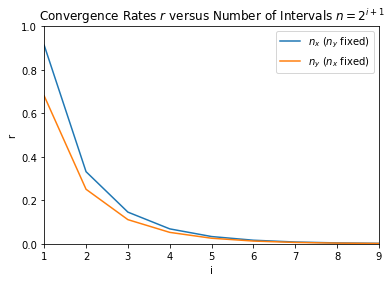

In [3]:
from numpy import array, log, arange
import matplotlib.pyplot as plt
%matplotlib inline

def midpoint2D(f, a, b ,c, d, nx, ny):
    hx = (b - a) / (nx - 1)
    hy = (d - c) / (ny - 1)
    W = array([[f(a + hx / 2 + i * hx, c + hy / 2 + j * hy) for j in range(ny)] for i in range(nx)])
    return hx * hy * W.sum()

def test_midpoint2D():
    f = lambda x, y: 2 * x + y
    I = midpoint2D(f, 0, 2, 2, 3, 1000, 1000)
    print('Test midpoint2D:')
    print('Integral [2->3][0->2](2x+y)dxdy = %f' % I)
    pass

test_midpoint2D()  # test the code

# (2.c Optional) demonstrating correct convergence rates
q = 10  # i=1,2,...,q & n=2^{i+1}

f = lambda x, y: 2 * x + y

Ex = [midpoint2D(f, 0, 2, 2, 3, 2**(i+1), 10) for i in range(q)]
rx = [-(log(Ex[i] / Ex[i-1]) / log(2**(i+1) / 2**i)) for i in range(1, q)]

Ey = [midpoint2D(f, 0, 2, 2, 3, 10, 2**(i+1)) for i in range(q)]
ry = [-(log(Ey[i] / Ey[i-1]) / log(2**(i+1) / 2**i)) for i in range(1, q)]

plt.title(r'Convergence Rates $r$ versus Number of Intervals $n=2^{i+1}$')
plt.xlabel('i')
plt.ylabel('r')
plt.plot(range(1, q), rx)
plt.plot(range(1, q), ry)
plt.ylim(0, 1)
plt.xlim(1, 9)
plt.legend([r'$n_x\ (n_y\ {\rm fixed})$', r'$n_y\ (n_x\ {\rm fixed})$'])
plt.show()

#### 4. Please use Romberg integration to obtain a eighth-order accurate approximation to

In [4]:
def midpoint(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h/2, b - h/2, n)
    return h * sum(f(x))

def Romberg(f, a, b, N=4):  # N denotes the level of accuracy
    n = 100  # th initial number of segments
    
    # the matrix
    T = np.zeros([N, N])
    T[:, 0] = np.array([midpoint(f, a, b, 2**i * n) for i in range(N)])
    for k in range(1, N):
        for j in range(N-k):
            T[j][k] = (4**(k) * T[j+1][k-1] - T[j][k-1]) / (4**(k) - 1)
    
    I = T[0][-1]  # the integral result
    
    return I, T

#### (1)
$$
\int_{-1}^1 \frac{dx}{1+x^2}=\frac{\pi}{2}
$$

In [5]:
f = lambda x: 1 / (1 + x**2)

I, T = Romberg(f, -1, 1, 4)

print('The matrix:')
print(T)
print('The result:\n I =', I)

The matrix:
[[1.57081299 1.57079633 1.57079633 1.57079633]
 [1.57080049 1.57079633 1.57079633 0.        ]
 [1.57079737 1.57079633 0.         0.        ]
 [1.57079659 0.         0.         0.        ]]
The result:
 I = 1.5707963267948948


#### (2)
$$
\int_{-\infty}^{\infty}\frac{dx}{(e^x+x+1)^2+\pi^2}=\frac{2}{3}
$$

We substitute $\dfrac{6x}{1-x^2}$ for $x$ and take the integral over $[-1, 1]$, i.e.
$$
\int_{-1}^{1}{\frac{6\frac{1+x^2}{(1-x^2)^2}}{\left[\exp\left(\frac{6x}{1-x^2}\right) + \frac{6x}{1-x^2}+1\right]^2+\pi^2}}\ {\rm d}x=\frac{2}{3}
$$

In [6]:
a = 6.0
f = lambda x: a*(1+x**2) / (1-x**2)**2 / ((np.exp(a*x/(1-x**2)) + a*x/(1-x**2) + 1)**2 + np.pi**2)

I, T = Romberg(f, -1, 1, 4)

print('The matrix:')
print(T)
print('The result:\n I =', I)

The matrix:
[[0.66667593 0.66666667 0.66666667 0.66666667]
 [0.66666898 0.66666667 0.66666667 0.        ]
 [0.66666725 0.66666667 0.         0.        ]
 [0.66666681 0.         0.         0.        ]]
The result:
 I = 0.6666666666666659


c:\users\shenxchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
c:\users\shenxchen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#### 5. Try with Gauss-Legendre formula to determine the integral using 5, 10, and 20 points: 
$$
I = \int_0^1 \frac{\sin t}{t}dt
$$

**Answer**:
$$
I = \frac{1}{2}\int_{-1}^1 \frac{\sin t}{t}dt\approx\frac{1}{2}\sum_{k=1}^n\omega_k \frac{\sin x_k}{x_k}
$$

In [7]:
from numpy import array, sin, dot

f = lambda t: sin(t) / t # the integrand

x1 = array([-0.906179845938664, -0.538469310105683,0.000000000000001, \
            0.538469310105683, 0.906179845938664])  # 5 nodes
x2 = array([-0.973906528517171720, -0.865063366688984511, \
            -0.679409568299024406, -0.433395394129247191, \
            -0.148874338981631211, 0.148874338981631211, \
            0.433395394129247191, 0.679409568299024406, \
            0.865063366688984511, 0.973906528517171720])  # 10 nodes
x3 = array([-0.993128599185094924786, -0.963971927277913791268,\
            -0.912234428251325905868, -0.839116971822218823395,\
            -0.746331906460150792614, -0.636053680726515025453,\
            -0.510867001950827098004, -0.373706088715419560673,\
            -0.227785851141645078080, -0.076526521133497333755,\
            0.076526521133497333755, 0.227785851141645078080,\
            0.373706088715419560673, 0.510867001950827098004,\
            0.636053680726515025453, 0.746331906460150792614,\
            0.839116971822218823395, 0.912234428251325905868,\
            0.963971927277913791268, 0.993128599185094924786])  # 20 nodes

w1 = array([0.236926885056189, 0.478628670499366, 0.568888888888889,\
           0.478628670499366, 0.236926885056189])  # weights of 5 nodes
w2 = array([0.066671344308688138, 0.149451349150580593, \
            0.219086362515982044, 0.269266719309996355, \
            0.295524224714752870, 0.295524224714752870, \
            0.269266719309996355, 0.219086362515982044, \
            0.149451349150580593, 0.066671344308688138])  # weights of 10 nodes
w3 = array([0.017614007139152118312, 0.040601429800386941331, \
            0.062672048334109063570, 0.083276741576704748725, \
            0.101930119817240435037, 0.118194531961518417312, \
            0.131688638449176626898, 0.142096109318382051329, \
            0.149172986472603746788, 0.152753387130725850698, \
            0.152753387130725850698, 0.149172986472603746788, \
            0.142096109318382051329, 0.131688638449176626898, \
            0.118194531961518417312, 0.101930119817240435037, \
            0.083276741576704748725, 0.062672048334109063570, \
            0.040601429800386941331, 0.017614007139152118312])  # weights of 20 nodes

I1 = dot(w1, f(x1)) / 2
I2 = dot(w2, f(x2)) / 2
I3 = dot(w3, f(x3)) / 2

print('[5 nodes]\nI = %.16f\n' % I1)
print('[10 nodes]\nI = %.16f\n' % I2)
print('[20 nodes]\nI = %.16f\n' % I3)

[5 nodes]
I = 0.9460830704032701

[10 nodes]
I = 0.9460830703671831

[20 nodes]
I = 0.9460830703671829

